In [3]:
#!/usr/bin/env python3
# Post process a single file
from pathlib import Path
import h5py
from postprocessor.core.processor import PostProcessorParameters, PostProcessor
from agora.io.signal import Signal

from pathos.multiprocessing import Pool

In [4]:
folder = Path("/home/alan/Documents/dev/skeletons/data/21177_2022_02_03_Mad1_noco_00/")

In [5]:
def process_file(filepath):
    try:
        # for filepath in Path(folder).rglob("*.h5"):
        with h5py.File(filepath, "a") as f:
            if "postprocessing" in f:
                del f["/postprocessing"]
            if "modifiers" in f:
                del f["/modifiers"]

            params = PostProcessorParameters.default().to_dict()
            pp = PostProcessor(filepath, params)
            pp.run()
            #s = Signal(filepath)
            # s.datasets
        # df = s["/extraction/general/None/area"]

    except Exception as e:
        print(filepath, " failed")
        print(e)


with Pool(10) as p:
    results = p.map(lambda x: process_file(x), Path(folder).rglob("*.h5"))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:53<00:00,  8.89s/it]


In [6]:
from postprocessor.grouper import NameGrouper
g=NameGrouper("/home/alan/Documents/dev/skeletons/data/21177_2022_02_03_Mad1_noco_00")


In [8]:
g.siglist

extraction/general/None/area
extraction/general/None/eccentricity
extraction/general/None/volume
postprocessing/births/extraction_general_None_volume
postprocessing/bud_metric/extraction_general_None_volume
postprocessing/bud_metric/postprocessing_dsignal_extraction_general_None_volume
postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume
postprocessing/bud_metric/postprocessing_savgol_extraction_general_None_volume
postprocessing/dsignal/extraction_general_None_volume
postprocessing/dsignal/postprocessing_bud_metric_extraction_general_None_volume
postprocessing/dsignal/postprocessing_savgol_extraction_general_None_volume
postprocessing/experiment_wide/aggregated
postprocessing/lineage/daughter_label
postprocessing/lineage/mother_label
postprocessing/lineage/trap
postprocessing/lineage_merged/daughter_label
postprocessing/lineage_merged/mother_label
postprocessing/lineage_merged/trap
postprocessing/savgol/extraction_general_None_volume


In [10]:
import seaborn as sns
sns.heatmap(g.concat_signal("postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume"))

Looking at Looking at Looking at Looking at Looking at Looking at   Looking at   Mad2_017Looking at  Mps1_008Mad1_012 Mad1_016
  Mad1_014



Mad2_019Mad1Mad1_023
Mad1Mad1_025

Looking at Looking at   Mps1_010Mad2_021

Looking at  H99_005
Looking at  H99_001
Looking at  H99_003


<AxesSubplot:ylabel='group-position-trap-cell_label'>

In [ ]:
df = g.concat_signal("postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume",mode="raw")
df.shape

In [ ]:
sns.heatmap(df, robust=True)
import matplotlib.pyplot as plt
plt.savefig('bud_gr.png', dpi=300)

In [ ]:
filt=df.loc[df.notna().sum(axis=1)>df.shape[1]*0.5]
sns.heatmap(filt.loc[filt.apply(lambda x: x.first_valid_index(), axis=1).sort_values().index], robust=True)
plt.savefig('tmp.png', dpi=200)

Looking at Looking at Looking at Looking at  Looking at Looking at Looking at Looking at    Mad2_017   Mad1_016Mad1_012Mps1_008
Mad1Mad1_023
 Mad2_019

Mad1Mad1_025
Mad1_014


Looking at  Mps1_010Looking at Looking at Looking at  Looking at  
  H99_003Mad2_021
H99_001
H99_005



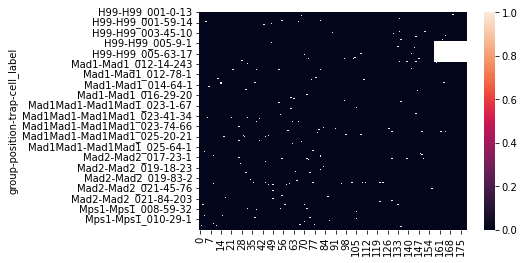

In [16]:
births = g.concat_signal("postprocessing/births/extraction_general_None_volume", mode='raw')
sns.heatmap(births)
import matplotlib.pyplot as plt
plt.savefig('births.png', dpi=200)

In [29]:
vols = g.concat_signal('postprocessing/bud_metric/postprocessing_savgol_extraction_general_None_volume', mode='raw')
vols = vols.loc[vols.notna().sum(axis=1)>0.5*vols.shape[1]]

Looking at Looking at Looking at Looking at Looking at  Looking at Looking at Looking at       Mad1_016
Mad2_017Mps1_008 Mad1_014Mad1_012
Mad2_019
Mad1Mad1_025
Mad1Mad1_023



Looking at  Looking at Looking at Looking at Looking at Mps1_010   
Mad2_021 
H99_001H99_005

H99_003


In [30]:
print(vols.shape, births.shape)

(155, 180) (4848, 180)


<AxesSubplot:xlabel='group', ylabel='0'>

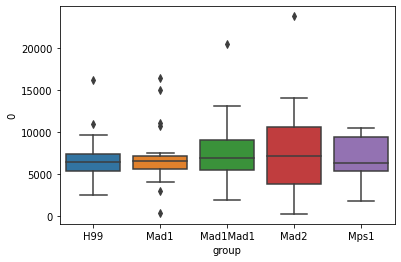

In [47]:
tmp_vols = vols
sns.boxplot(data=tmp_vols.where(births.loc[vols.index].astype(bool)).median(axis=1).reset_index(),x='group', y=0)

<AxesSubplot:xlabel='group', ylabel='0'>

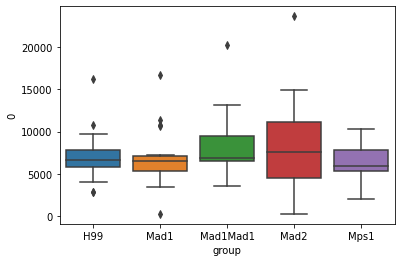

In [48]:
sns.boxplot(data=vols.where(births.loc[vols.index].astype(bool).shift(1, axis=1)).median(axis=1).reset_index(),x='group', y=0)

In [ ]:
#We check the volume of the previous daughter before a birth
postprocessing/bud_metric/extraction_general_None_volume

We index the mothers using the same order as bud_metric

In [ ]:
df=g.concat_signal('extraction/general/None/volume')
#sns.heatmap(g)

In [ ]:
sns.heatmap(df.loc[df.index.intersection(filt.index)])

In [ ]:
sns.boxplot(data=filt.iloc[:,:70].max(axis=1).reset_index(), x='group', y=0)


In [ ]:
sns.boxplot(data=filt.iloc[:,70:150].max(axis=1).reset_index(), x='group', y=0)

In [ ]:
ratio = (filt.iloc[:,:70].max(axis=1) / filt.iloc[:,70:150].max(axis=1)).reset_index()
sns.boxplot(data=ratio[ratio[0]>0],x='group',y=0)

In [ ]:
meanbgr = df.loc[df.notna().sum(axis=1)>df.shape[1]*0.5].max(axis=1).reset_index()
sns.boxplot(data=meanbgr[meanbgr[0]>0], x='group', y=0)

In [ ]:
meanbgr = df.mean(axis=1).reset_index()
sns.boxplot(data=meanbgr[meanbgr[0]>0], x='group', y=0)

In [ ]:
postprocessing/dsignal/postprocessing_bud_metric_extraction_general_None_volume